In [5]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt

In [6]:
# Creating the DataFrame
eff_df = pd.DataFrame()

def extract_profiler_data(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    file_name = os.path.basename(file_path).replace('.txt', '')  
    text=content
    
    

    excl_pattern = re.compile(
        r"Name\s+NCalls\s+Excl\. Min\s+Excl\. Avg\s+Excl\. Max\s+Max %\n"
        r"-+\n"
        r"((?:.+\n)+)"
        r"-+", re.MULTILINE
    )
    excl_match = excl_pattern.search(content)
    excl_table_data = excl_match.group(1).strip() if excl_match else ""


    incl_pattern = re.compile(
        r"Name\s+NCalls\s+Incl\. Min\s+Incl\. Avg\s+Incl\. Max\s+Max %\n"
        r"-+\n"
        r"((?:.+\n)+)"
        r"-+", re.MULTILINE
    )
    incl_match = incl_pattern.search(content)
    incl_table_data = incl_match.group(1).strip() if incl_match else ""
    # print(incl_table_data)
    
    # Define the string to search for
    search_strings = ["Only KNAPSACK  efficiency: ","Only SFC efficiency: ","SFC+Knapsack combined efficiency: "]
    
    
    
    knapsack_eff=''
    SFC_eff=''
    sfc_knapsack_eff=''


    for search_string in search_strings:
        # Find the index of the search string
        index = text.find(search_string)

        if index != -1:
            # Extract the value after the search string
            value = text[index + len(search_string):].split()[0]  # Get the next word
            # print("The value after '{}' is: {}".format(search_string.strip(), value))
            if(search_string=="KNAPSACK efficiency: "):
                knapsack_eff=value
                # i=i+1
            elif(search_string=="SFC efficiency: "):
                SFC_eff= value
            else:
                sfc_knapsack_eff=value

        else:
            print("String not found.")
    global eff_df
    new_row = {'Output': file_name, 'knapsack_eff': knapsack_eff, 'SFC_eff': SFC_eff,'sfc_knapsack_eff':sfc_knapsack_eff }
    eff_df = pd.concat([eff_df, pd.DataFrame([new_row])], ignore_index=True)
    # eff_df = eff_df.append(new_row, ignore_index=True)

    # Display the updated DataFrame
    # print(eff_df)
    def parse_table(table_data, columns):
        rows = table_data.strip().split("\n")
        data = []
        for row in rows:
            parts = re.split(r'\s{2,}', row.strip())
            data.append(dict(zip(columns, parts)))
        return data

    excl_columns = ['Name', 'NCalls', 'Excl. Min', 'Excl. Avg', 'Excl. Max', 'Max %']
    incl_columns = ['Name', 'NCalls', 'Incl. Min', 'Incl. Avg', 'Incl. Max', 'Max %']

    excl_data = parse_table(excl_table_data, excl_columns)
    incl_data = parse_table(incl_table_data, incl_columns)

    df_excl = pd.DataFrame(excl_data)
    df_incl = pd.DataFrame(incl_data)
    

    return df_excl, df_incl



In [7]:
def extract_from_multiple_files(files, output_file):
    efficiency_data = []  
    with pd.ExcelWriter(output_file) as writer:
        for file_path in files:
            file_name = os.path.basename(file_path).replace('.txt', '')  
            df_excl, df_incl = extract_profiler_data(file_path)
            
            # excl_sheet_name = f'{file_name}_Excl'
            incl_sheet_name = f'{file_name}_Incl'
            
            
            # df_excl.to_excel(writer, sheet_name=excl_sheet_name, index=False)
            df_incl.to_excel(writer, sheet_name=incl_sheet_name, index=False)


In [8]:
files_best = ['./output/2_4_output_best.txt','./output/2_8_output_best.txt','./output/2_16_output_best.txt', 
         './output/4_4_output_best.txt','./output/4_8_output_best.txt','./output/4_16_output_best.txt',
         './output/8_4_output_best.txt','./output/8_8_output_best.txt','./output/8_16_output_best.txt',
         './output/16_4_output_best.txt','./output/16_8_output_best.txt','./output/16_16_output_best.txt',
         './output/32_4_output_best.txt','./output/32_8_output_best.txt','./output/32_16_output_best.txt',
         './output/64_4_output_best.txt','./output/64_8_output_best.txt','./output/64_16_output_best.txt',
         './output/128_4_output_best.txt','./output/128_8_output_best.txt','./output/128_16_output_best.txt',
         ] 

output_excel_file_best = './output/all_profiler_data_best.xlsx'

In [9]:
extract_from_multiple_files(files_best, output_excel_file_best)


In [10]:
def load_incl_data(file_path):
    excel_data = pd.ExcelFile(file_path)

    combined_data = []  


    for sheet_name in excel_data.sheet_names:
   
        if 'Incl' in sheet_name:
      
            sheet_df = pd.read_excel(excel_data, sheet_name=sheet_name)
            sheet_df['Max %'] = sheet_df['Max %'].astype(str)
            output_size = sheet_name.split('_Incl')[0]
        
            sheet_df['Output'] = output_size
            sheet_df['Type'] = 'Incl. Avg'
            
            combined_data.append(sheet_df)
    return pd.concat(combined_data, ignore_index=True)

# file_path = './output/all_profiler_data.xlsx' 
file_path = './output/all_profiler_data_best.xlsx' 
incl_data = load_incl_data(file_path)

# incl_data['Incl. Avg'] = pd.to_numeric(incl_data['Incl. Avg'], errors='coerce')

print(incl_data.head())  



                            Name  NCalls  Incl. Min  Incl. Avg Incl. Max  \
0                           main       1   0.038830   0.038830   0.03883   
1  SFCProcessorMapDoItCombined()       1   0.021960   0.021960   0.02196   
2                 KnapSackDoIt()       1   0.007380   0.007380   0.00738   
3          SFCProcessorMapDoIt()       1   0.004807   0.004807  0.004807   
4                   Distribute()       2   0.004187   0.004187  0.004187   

    Max %           Output       Type  
0  99.95%  2_4_output_best  Incl. Avg  
1  56.51%  2_4_output_best  Incl. Avg  
2  19.00%  2_4_output_best  Incl. Avg  
3  12.37%  2_4_output_best  Incl. Avg  
4  10.78%  2_4_output_best  Incl. Avg  


In [11]:
incl_data

,Name,NCalls,Incl. Min,Incl. Avg,Incl. Max,Max %,Output,Type
0,main,1,0.038830,0.038830,0.03883,99.95%,2_4_output_best,Incl. Avg
1,SFCProcessorMapDoItCombined(),1,0.021960,0.021960,0.02196,56.51%,2_4_output_best,Incl. Avg
2,KnapSackDoIt(),1,0.007380,0.007380,0.00738,19.00%,2_4_output_best,Incl. Avg
3,SFCProcessorMapDoIt(),1,0.004807,0.004807,0.004807,12.37%,2_4_output_best,Incl. Avg
4,Distribute(),2,0.004187,0.004187,0.004187,10.78%,2_4_output_best,Incl. Avg
...,...,...,...,...,...,...,...,...
133,Distribute(),2,0.198000,0.198000,0.198,15.70%,128_16_output_best,Incl. Avg
134,KnapSackDoIt(),1,0.046760,0.046760,0.04676,3.71%,128_16_output_best,Incl. Avg
135,SFCProcessorMapDoIt(),1,0.023480,0.023480,0.02348,1.86%,128_16_output_best,Incl. Avg
136,knapsack(),129,0.000207,0.000207,0.0002072,0.02%,128_16_output_best,Incl. Avg


In [12]:
# incl_data.head(50)


In [13]:
nan_values = incl_data.isna().sum()

In [14]:
print(nan_values)

Name         0
NCalls       0
Incl. Min    0
Incl. Avg    0
Incl. Max    0
Max %        0
Output       0
Type         0
dtype: int64


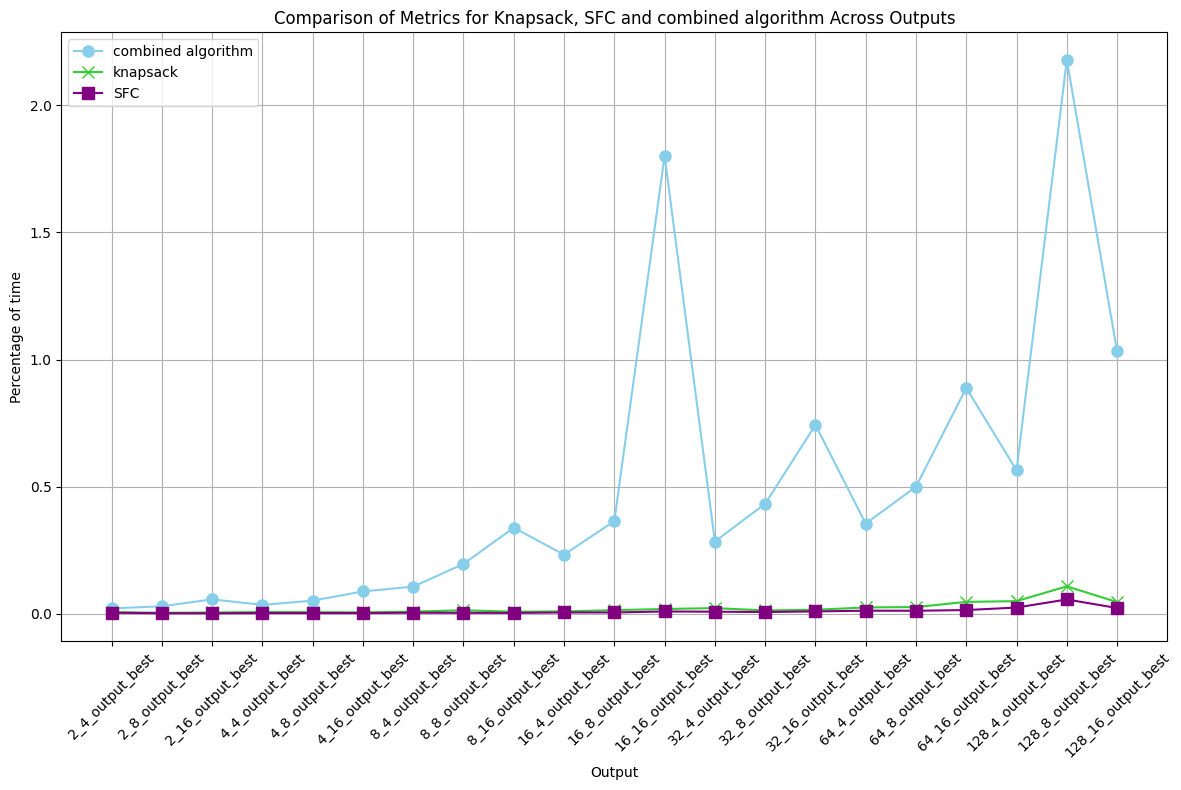

In [18]:


# Filter for 'painterPartition()'
combined_data = incl_data[incl_data['Name'] == 'SFCProcessorMapDoItCombined()'].copy()
combined_data.rename(columns={'Incl. Avg':'Combined'},inplace=True)

# Filter for 'KnapSackDoIt()'
knapsack_data = incl_data[incl_data['Name'] == 'KnapSackDoIt()'].copy() 
knapsack_data.rename(columns={'Incl. Avg':'knapsack'},inplace=True)
# Filter for 'SFCProcessorMapDoIt()'
SFC_data = incl_data[incl_data['Name'] == 'SFCProcessorMapDoIt()'].copy()
SFC_data.rename(columns={'Incl. Avg':'SFC'},inplace=True)

# print(painter_data.shape)
# print(knapsack_data.shape)
# print(SFC_data.shape)
# print(painter_data.head())
# print(knapsack_data.head())

merged_df=pd.merge(combined_data,knapsack_data,on='Output',how='inner').merge(SFC_data,on='Output',how='inner').merge(eff_df,on='Output',how='inner')
result_df=merged_df[['Output','Combined','knapsack','SFC','SFC_eff','knapsack_eff','sfc_knapsack_eff']]
# print(result_df)

def plot_main_metrics(main_data):
    plt.figure(figsize=(12, 8))

    plt.plot(main_data['Output'], main_data['Combined'], marker='o', label='combined algorithm', color='skyblue', markersize=8)
    plt.plot(main_data['Output'], main_data['knapsack'], marker='x', label='knapsack', color='limegreen', markersize=8)
    plt.plot(main_data['Output'], main_data['SFC'], marker='s', label='SFC', color='purple', markersize=8)
    # plt.plot(main_data['Output'], main_data['SFC_eff'], marker='>', label='SFC_eff', color='mediumpurple', markersize=8)
    # plt.plot(main_data['Output'], main_data['knapsack_eff'], marker='<', label='knapsack_eff', color='green', markersize=8)
    # plt.plot(main_data['Output'], main_data['painter_eff'], marker='*', label='painter_eff', color='blue', markersize=8)
   
    plt.title('Comparison of Metrics for Knapsack, SFC and combined algorithm Across Outputs')
    plt.xlabel('Output')
    plt.ylabel('Percentage of time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

  
    plt.show()

plot_main_metrics(result_df)

In [20]:
result_df

,Output,Combined,knapsack,SFC,SFC_eff,knapsack_eff,sfc_knapsack_eff
0,2_4_output_best,0.02196,0.007380,0.004807,,,0.9962002869
1,2_8_output_best,0.03019,0.004717,0.003107,,,0.9982854168
2,2_16_output_best,0.05753,0.005955,0.002806,,,0.9995046839
3,4_4_output_best,0.03562,0.007800,0.003677,,,0.9962892728
4,4_8_output_best,0.05255,0.007359,0.003654,,,0.6679784913
5,4_16_output_best,0.08856,0.006349,0.003689,,,0.8024821055
6,8_4_output_best,0.10760,0.009315,0.004959,,,0.6688798119
7,8_8_output_best,0.19680,0.014780,0.004591,,,0.802459956
8,8_16_output_best,0.33920,0.008718,0.004283,,,0.889244415
9,16_4_output_best,0.23320,0.010110,0.005959,,,0.6680224244


In [19]:
def plot_main_metrics(main_data):
    plt.figure(figsize=(12, 8))
    SFC_data=[float(sfc_eff) for sfc_eff in main_data['SFC_eff']]
    knapsack_data=[float(knapsack_eff) for knapsack_eff in main_data['knapsack_eff']]
    sfc_knapsack_eff_data=[float(sfc_knapsack_eff) for sfc_knapsack_eff in main_data['sfc_knapsack_eff']]
    # plt.plot(main_data['Output'], main_data['painter'], marker='o', label='painterPartition', color='skyblue', markersize=8)
    # plt.plot(main_data['Output'], main_data['knapsack'], marker='x', label='knapsack', color='limegreen', markersize=8)
    # plt.plot(main_data['Output'], main_data['SFC'], marker='s', label='SFC', color='purple', markersize=8)
    plt.plot(main_data['Output'], SFC_data, marker='>', label='SFC_eff', color='mediumpurple', markersize=8)
    plt.plot(main_data['Output'], knapsack_data, marker='<', label='knapsack_eff', color='green', markersize=8)
    plt.plot(main_data['Output'], sfc_knapsack_eff_data, marker='*', label='sfc_knapsack_eff', color='blue', markersize=8)
    # plt.bar(main_data['Output'], SFC_data,  label='SFC_eff', color='mediumpurple')
    # plt.bar(main_data['Output'], knapsack_data,  label='SFC_eff', color='blue')
    # plt.bar(main_data['Output'], painter_data,  label='SFC_eff', color='green')
    plt.title('Comparison of Metrics for Knapsack, SFC and combined efficiency Outputs')
    plt.xlabel('Output')
    plt.ylabel('Time / Percentage')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

  
    plt.show()

plot_main_metrics(result_df)

ValueError: could not convert string to float: ''

<Figure size 1200x800 with 0 Axes>